<a name="index"></a>
<h1 align="center">Análise de Dados Eleitorais</h1>
______________________________________________________________________________________________________________________________

# 1 - Introdução e Objetivo do Projeto

Este notebook tem objetivo de proporcionar um ambiente de análise de dados eleitorais.

## Objetivo das análises
* [01](#analysis_1)- Mostrar a classificação do eleitorado a partir do estado civil, escolaridade e faixa etária, além da quantidade de eleitores que utilizam nome social;  
* [02](#analysis_2)- Relacionar as características do eleitorado de acordo com o representante eleito em determinada região;  
* [03](#analysis_3)- Mostrar a renda média do eleitorado de determinada região;  
* [04](#analysis_4)- Mostrar, daquela região, a cidade com mais eleitores jovem e mais eleitores idosos;  
* [05](#analysis_5)- Comparar a renda média de eleitores do Vale do Paraíba com a de outras regiões do Estado; 
* [06](#analysis_6)- Automatizar a exportação das estatísticas;  
* [07](#analysis_7)- Relacionar características do eleitorado de acordo com o representante eleito em determinada região de eleições futuras;  
* [08](#analysis_8)- Mostrar a percentagem de eleitores ausentes da última eleição;  
* [09](#analysis_9)- Mostrar a evolução do número de eleitores;  
* [10](#analysis_10) Análise de dados feita em Jupyter Notebook.

<a name="dev"></a>
# 2 - Preparativos


Instale as dependências deste projeto através do comando:

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


Importando as libs necessarias para rodar o projeto:

In [2]:
# libs para análise de dados + graficos
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import matplotlib.pyplot as plt

# libs auxiliares
import os
from os import walk
import datetime

print("Importações e configurações concluídas ✔️ ")

Importações e configurações concluídas ✔️ 


# 3 - Getting started

## 3.1 Configuração: Região de Estudo

### 3.1.1 Macroregiões

Para orientar-se por macrorregiões é possível escolher um município ou uma lista de municípios. Para o exemplo iremos colocar as regiões do Vale do Paraíba, Vale Histórico, Litoral Norte, Serra da Mantiqueira e Região Brangantina:

In [3]:
macro_regiao = {
    "VALE DO PARAÍBA": [
        "APARECIDA",
        "CAÇAPAVA",
        "CACHOEIRA PAULISTA",
        "CANAS",
        "CUNHA",
        "GUARATINGUETÁ",
        "IGARATÁ",
        "JACAREÍ",
        "JAMBEIRO",
        "LAGOINHA",
        "LORENA",
        "NATIVIDADE DA SERRA",
        "PARAIBUNA",
        "PINDAMONHANGABA",
        "PIQUETE",
        "POTIM",
        "REDENÇÃO DA SERRA",
        "ROSEIRA",
        "SANTA BRANCA",
        "SÃO JOSÉ DOS CAMPOS",
        "SÃO LUÍS DO PARAITINGA",
        "TAUBATÉ",
        "TREMEMBÉ"
    ],
    "VALE HISTÓRICO": [
        "ARAPEÍ",
        "AREIAS",
        "BANANAL",
        "CRUZEIRO",
        "LAVRINHAS",
        "QUELUZ",
        "SÃO JOSÉ DO BARREIRO",
        "SILVEIRAS"
    ],
    "LITORAL NORTE": [
        "ILHABELA",
        "SÃO SEBASTIÃO",
        "UBATUBA",
        "CAMPOS DO JORDÃO",
        "MONTEIRO LOBATO",
        "SANTO ANTÔNIO DO PINHAL",
        "SÃO BENTO DO SAPUCAÍ"
    ],
    "REGIÃO BRAGANTINA": [
        "BOM JESUS DOS PERDÕES",
        "BRAGANÇA PAULISTA",
        "JOANÓPOLIS",
        "NAZARÉ PAULISTA",
        "PIRACAIA",
        "VARGEM"
    ]
}

### 3.1.2 Municípios foco

As variáveis `municipio_1`, `municipio_2` e `municipio_3` guardarão o nome dos municípios que terão mais foco durante a análise. Tome cuidado com a escrita: o município deve ser declarado com a **acentuação e espaçamento corretos**, além de estar **entre aspas**!


In [4]:
all_cities = []

for regiao in macro_regiao:
    all_cities+= macro_regiao[regiao]

print(all_cities)

['APARECIDA', 'CAÇAPAVA', 'CACHOEIRA PAULISTA', 'CANAS', 'CUNHA', 'GUARATINGUETÁ', 'IGARATÁ', 'JACAREÍ', 'JAMBEIRO', 'LAGOINHA', 'LORENA', 'NATIVIDADE DA SERRA', 'PARAIBUNA', 'PINDAMONHANGABA', 'PIQUETE', 'POTIM', 'REDENÇÃO DA SERRA', 'ROSEIRA', 'SANTA BRANCA', 'SÃO JOSÉ DOS CAMPOS', 'SÃO LUÍS DO PARAITINGA', 'TAUBATÉ', 'TREMEMBÉ', 'ARAPEÍ', 'AREIAS', 'BANANAL', 'CRUZEIRO', 'LAVRINHAS', 'QUELUZ', 'SÃO JOSÉ DO BARREIRO', 'SILVEIRAS', 'ILHABELA', 'SÃO SEBASTIÃO', 'UBATUBA', 'CAMPOS DO JORDÃO', 'MONTEIRO LOBATO', 'SANTO ANTÔNIO DO PINHAL', 'SÃO BENTO DO SAPUCAÍ', 'BOM JESUS DOS PERDÕES', 'BRAGANÇA PAULISTA', 'JOANÓPOLIS', 'NAZARÉ PAULISTA', 'PIRACAIA', 'VARGEM']


In [69]:
# Informe os municípios para análise
municipio_1 = "Caçapava"
municipio_2 = "Taubaté"            
municipio_3 = "São José dos Campos"            

# Checando se você digitou corretamente
if(set([municipio_1.upper(),municipio_2.upper(),municipio_3.upper()]).issubset(set(all_cities))):
    print(f"Municípios OK ✔️")
else:
    print("❌ Município com nome incorreto, tente novamente!")

Municípios OK ✔️


### 3.2 Configuração: Ano eleitoral
Para análises de apenas um município, temos à disposição os dados das eleições de 2018 e 2020. Abaixo as características das eleições que ocorreram nestes anos:

ANO  | TIPO DE ELEIÇÃO    | CARGOS                  |
:----|:-------------------|:------------------------|
2018 | Federal e Estadual | Presidente e Governador |
2020 | Municipal          | Prefeito                |

A variável `eleicao_ano` guarda o ano escolhido para as análises!<br>

In [6]:
# Informe o ano para análise
eleicao_ano = 2020

# listagem de anos eleitorais para cada 'tipo'
anos_eleicoes_federal = np.arange(1994, datetime.date.today().year+4, 4).tolist()
anos_eleicoes_municipal = np.arange(1996, datetime.date.today().year+4, 4).tolist()

if eleicao_ano in anos_eleicoes_federal or eleicao_ano in anos_eleicoes_municipal:
   print(f"Ano eleitoral {eleicao_ano} escolhido com sucesso ✔️")
else:
    print("❌ O ano escolhido não é um ano de eleição! Volte ao início do notebook, altere o ano e rode aquela e esta célula novamente")

Ano eleitoral 2020 escolhido com sucesso ✔️


### 3.3 Check list Arquivos de Dados (.csv)

Os dados que utilizados podem ser obtidos a partir do [IBGE - Instituto Brasileiro de Geografia e Estatística](https://cidades.ibge.gov.br/brasil/sp/sao-jose-dos-campos/pesquisa/19/29765?localidade1=355410&localidade2=355030) e do [TSE - Tribunal Superior Eleitoral](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais). <br>

**Arquivo sobre renda média dos municípios:**
- cadastro_central_de_empresas.csv

**Arquivos dos candidatos:**
- consulta_cand_2018_BRASIL.csv
- consulta_cand_2020_SP.csv

**Arquivos sobre a evolução da quantiade de eleitores:**
- eleitorado_municipio_2014.csv
- eleitorado_municipio_2016.csv
- eleitorado_municipio_2018.csv
- eleitorado_municipio_2020.csv

**Arquivos sobre comparecimento e abstenção dos eleitores:**
- perfil_comparecimento_abstencao_2018.csv
- perfil_comparecimento_abstencao_2020.csv

**Arquivos do eleitorado:**
- perfil_eleitorado_2018.csv
- perfil_eleitorado_2020.csv

### <font color='red'>**IMPORTANTE:**</font> Para ter os <i>.csv</i> mencionados disponíveis, você precisa ter todos os arquivos <i>.zip</i> descompactados dentro da pasta <b>\data</b> antes de seguir os próximos passos. 
### <font color='red'>**ATENÇÃO:**</font> As análises deste notebook são passíveis de atualização, mas para fazer análises de anos futuros é necessário colocar os novos <i>.csv</i> descompactados juntamente com os já presentes.

Para este projeto rodar é necessario ter arquivos de dados especificos no formato *.csv* na pasta */data* .
A célula a seguir analisa se todos os arquivos necessarios estão presentes de acordo com o ano escolhido na variável: `eleicao_ano`.

In [7]:
# verificando quantos CSVs com o ano escolhido existem na pasta "/data"
data_folder = 'data'

csvs = 0
for path, _, files in walk(data_folder):
    for csv in files:
        if str(eleicao_ano) in csv and '.csv' in csv:
            # caso tiver algum CSV contendo o ano escolhido, soma 1
            csvs += 1          
if csvs > 0:
     # existe pelo menos 1 CSV do ano escolhido
    if csvs < 4:
        # caso ainda faltem algum CSV, por mais que tenha pelo menos 1 com o ano escolhido
        print("Falta algum CSV para que todas as análises funcionem!")
        for path, _, files in walk(data_folder):
            for csv in files:
                if f'eleitorado_municipio_{eleicao_ano}.csv' not in csv:
                    print(f'Está faltando o arquivo: eleitorado_municipio_{eleicao_ano}.csv')
            for csv in files:
                if f'consulta_cand_{eleicao_ano}_SP.csv' not in csv:
                    print(f'Esta faltando o arquivo: consulta_cand_{eleicao_ano}_SP.csv')
            for csv in files:
                if f'consulta_cand_{eleicao_ano}_BRASIL.csv' not in csv:
                    print(f'Esta faltando o arquivo: consulta_cand_{eleicao_ano}_BRASIL.csv')
            for csv in files:
                if f'perfil_eleitorado_{eleicao_ano}.csv' not in csv:
                   print(f'Esta faltando o arquivo: perfil_eleitorado_{eleicao_ano}.csv')
            for csv in files:
                if f'perfil_comparecimento_abstencao_{eleicao_ano}.csv' not in csv:
                    print(f'Esta faltando o arquivo: perfil_comparecimento_abstencao_{eleicao_ano}.csv')
            
    else:
        # caso todos os CSVs necessários estejam na pasta
        print("O ano escolhido está disponível e com todos os CSVs necessários para as análises!")
else:
    # caso não tenha nenhum CSV do ano escolhido 
    print("Nenhum CSV disponível! Por favor, adicione os CSVs necesários na pasta '/data'!")

O ano escolhido está disponível e com todos os CSVs necessários para as análises!


### 3.4 Carregamento dos dados

Para deixar o processo mais rápido, vamos carregar apenas as informações necessárias dentro de uma infinidade de dados que teremos acesso. <br>

In [52]:
def build_path(filename):
    return fr'./{data_folder}/{filename}'

def build_df(filename, usecols=[]):
    if filename == 'cadastro_central_de_empresas.csv':
        return pd.read_csv(
            build_path(filename),
            sep= ';',
            on_bad_lines='skip')  
    if usecols == []:
        return pd.read_csv(
            build_path(filename),
            sep= ';',
            on_bad_lines='skip',
            encoding='iso-8859-1')
    else:
        return pd.read_csv(
            build_path(filename),
            sep= ';',
            usecols=usecols,
            on_bad_lines='skip',
            encoding='iso-8859-1')

In [39]:
# filtro de colunas
col_candidatos = ["NR_TURNO", "NM_UE", "DS_CARGO", "NM_CANDIDATO", "SG_PARTIDO", "DS_SIT_TOT_TURNO"]
col_eleitorado = ["NR_ANO_ELEICAO", "SG_UF", "NM_MUNICIPIO", "QTD_ELEITORES"]
col_perfil_eleitorado = [
    "ANO_ELEICAO", "SG_UF", "NM_MUNICIPIO", "DS_ESTADO_CIVIL", "CD_FAIXA_ETARIA", "DS_FAIXA_ETARIA", 
    "CD_GRAU_ESCOLARIDADE", "DS_GRAU_ESCOLARIDADE", "QT_ELEITORES_PERFIL", 
    "QT_ELEITORES_INC_NM_SOCIAL", "DS_GENERO"]
col_abstencao = ["NR_TURNO", "NM_MUNICIPIO", "QT_APTOS", "QT_COMPARECIMENTO", "QT_ABSTENCAO"]
col_despesas = ["NM_UE", "DS_CARGO", "NM_CANDIDATO", "VR_DESPESA_CONTRATADA" ]

In [85]:
# Carregando os Dataframes

df_renda_mun = build_df('cadastro_central_de_empresas.csv')
df_eleitorado_2014 = build_df('eleitorado_municipio_2014.csv',col_eleitorado)
df_eleitorado_2016 = build_df('eleitorado_municipio_2016.csv',col_eleitorado)
df_eleitorado_2018 = build_df('eleitorado_municipio_2018.csv',col_eleitorado)
df_eleitorado_2020 = build_df('eleitorado_municipio_2020.csv',col_eleitorado)
df_candidatos = build_df(f'consulta_cand_{eleicao_ano}_BRASIL.csv', col_candidatos) if eleicao_ano == 2018 else build_df(f'consulta_cand_{eleicao_ano}_SP.csv', col_candidatos)
df_perfil_eleitorado = build_df(f'perfil_eleitorado_{eleicao_ano}.csv', col_perfil_eleitorado)
df_abstencao = build_df(f'perfil_comparecimento_abstencao_{eleicao_ano}.csv', col_abstencao)
df_despesas = build_df('despesas_contratadas_candidatos_2020_SP.csv', col_despesas) if eleicao_ano == 2020 else build_df('despesas_contratadas_candidatos_2018_SP.csv', col_despesas)
print('dfs carregados com sucesso!')

dfs carregados com sucesso!


# 4 - Análises

Configs das graficos

In [11]:
title_font={'fontweight':'bold','fontsize':22}
label_font={'fontweight':'bold','fontsize':16}

<a name="analysis_1"></a>
## 4.1 - Mostrar a classificação do eleitorado a partir do estado civil, escolaridade e faixa etária, além da quantidade de eleitores que utilizam nome social 

[Back to the top](#index)


In [12]:
gender_totals = df_perfil_eleitorado.groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].sum().reset_index()
gender_totals['PCTG'] = (gender_totals.QT_ELEITORES_PERFIL / gender_totals.QT_ELEITORES_PERFIL.sum()) * 100
gender_totals

,DS_GENERO,QT_ELEITORES_PERFIL,PCTG
0,FEMININO,77649569,52.494839
1,MASCULINO,70228457,47.477810
2,NÃO INFORMADO,40457,0.027351


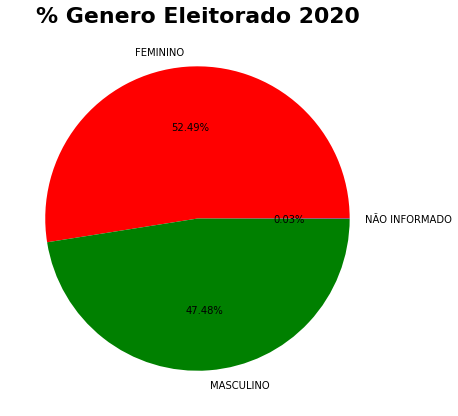

In [13]:
plt.figure(figsize=(15,7))
plt.title(f'% Genero Eleitorado {eleicao_ano}',fontdict=title_font)

plt.pie(gender_totals['PCTG'], labels=gender_totals['DS_GENERO'], autopct='%2.2f%%', colors=['red','green', 'blue'])
plt.show()

In [14]:
marital_status_totals = df_perfil_eleitorado.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().reset_index()
marital_status_totals['PCTG'] = (marital_status_totals.QT_ELEITORES_PERFIL / marital_status_totals.QT_ELEITORES_PERFIL.sum()) * 100
marital_status_totals = marital_status_totals.sort_values(by=['QT_ELEITORES_PERFIL'], ascending=False)

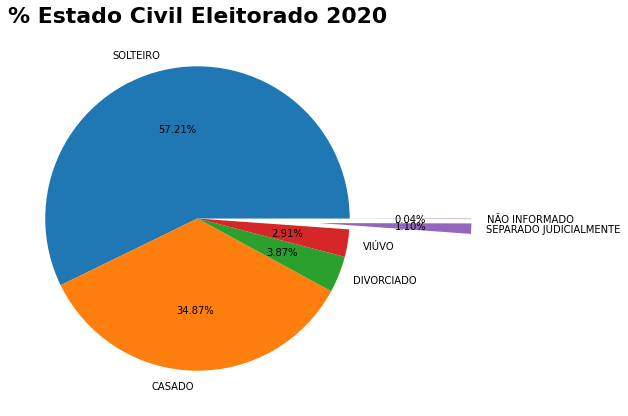

In [15]:
plt.figure(figsize=(15,7))
plt.title(f'% Estado Civil Eleitorado {eleicao_ano}',fontdict=title_font)
explode = [0, 0, 0, 0,0.8,0.8]

plt.pie(marital_status_totals['PCTG'], labels=marital_status_totals['DS_ESTADO_CIVIL'], 
        autopct='%2.2f%%', explode=explode)

plt.show()

In [16]:
# # bar option
# plt.figure(figsize=(20,14))
# x = marital_status_totals['DS_ESTADO_CIVIL'].to_list()
# y = marital_status_totals['PCTG'].to_list()
# plt.bar(x,y,color='b')
# # function to add value labels
# def add_labels(x,y):
#     for i in range(len(x)):
#         plt.text(i,y[i],y[i],ha = 'center')
# add_labels(x, y)
# plt.title(f'% Estado Civil Eleitorado {eleicao_ano}',fontdict=title_font)
# plt.show()

In [17]:
schooling_totals = df_perfil_eleitorado.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum().reset_index()
schooling_totals['PCTG'] = (schooling_totals.QT_ELEITORES_PERFIL / schooling_totals.QT_ELEITORES_PERFIL.sum()) * 100
schooling_totals = schooling_totals.sort_values(by=['QT_ELEITORES_PERFIL'], ascending=False)
schooling_totals

,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,PCTG
3,ENSINO MÉDIO COMPLETO,37681635,25.474595
2,ENSINO FUNDAMENTAL INCOMPLETO,35771791,24.183449
4,ENSINO MÉDIO INCOMPLETO,22900434,15.481793
7,SUPERIOR COMPLETO,15800520,10.681911
5,LÊ E ESCREVE,11574213,7.824724
1,ENSINO FUNDAMENTAL COMPLETO,9859257,6.665331
8,SUPERIOR INCOMPLETO,7723245,5.221285
0,ANALFABETO,6572249,4.443156
6,NÃO INFORMADO,35139,0.023756


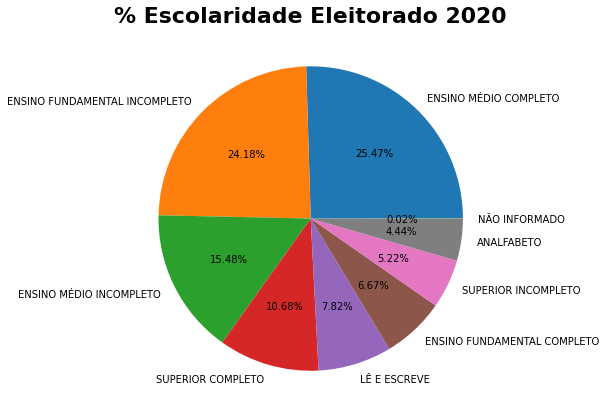

In [18]:
plt.figure(figsize=(15,7))
plt.title(f'% Escolaridade Eleitorado {eleicao_ano}',fontdict=title_font)

plt.pie(schooling_totals['PCTG'], labels=schooling_totals['DS_GRAU_ESCOLARIDADE'], 
        autopct='%2.2f%%')

plt.show()

In [19]:
age_group = df_perfil_eleitorado.groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum().reset_index()
age_group['PCTG'] = (age_group.QT_ELEITORES_PERFIL / age_group.QT_ELEITORES_PERFIL.sum()) * 100
age_group = age_group.sort_values(by=['QT_ELEITORES_PERFIL'], ascending=False)
age_group

,DS_FAIXA_ETARIA,QT_ELEITORES_PERFIL,PCTG
9,35 a 39 anos,15938174,10.774971
8,30 a 34 anos,15423585,10.427084
7,25 a 29 anos,15178770,10.261578
10,40 a 44 anos,14748141,9.970452
11,45 a 49 anos,12979183,8.774551
6,21 a 24 anos,12349829,8.349078
12,50 a 54 anos,12147351,8.212193
13,55 a 59 anos,11198821,7.570941
14,60 a 64 anos,9372283,6.336114
15,65 a 69 anos,7350599,4.969358


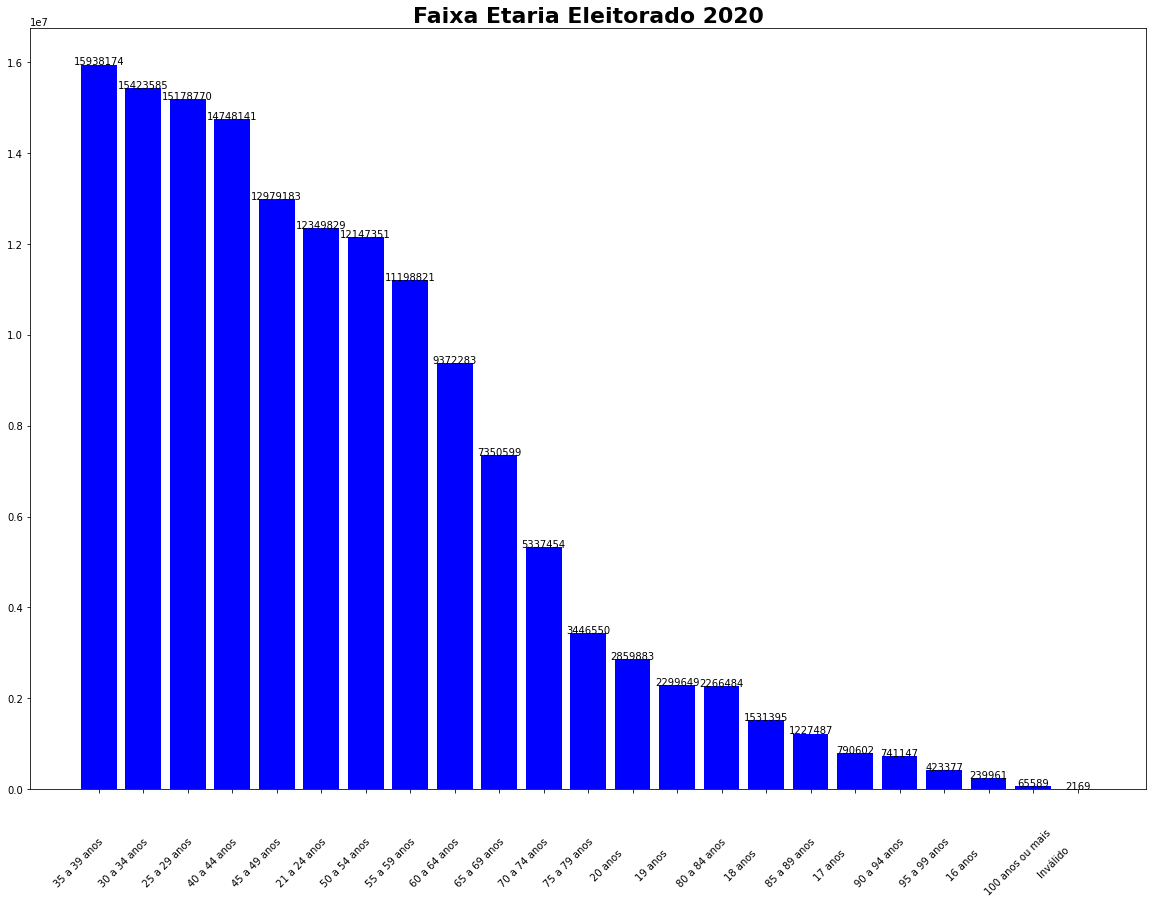

In [20]:
# bar option
plt.figure(figsize=(20,14))
x = age_group['DS_FAIXA_ETARIA'].to_list()
y = age_group['QT_ELEITORES_PERFIL'].to_list()
plt.bar(x,y,color='b')
# function to add value labels
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')
add_labels(x, y)
plt.title(f'Faixa Etaria Eleitorado {eleicao_ano}',fontdict=title_font)

plt.xticks(rotation=45)

plt.show()

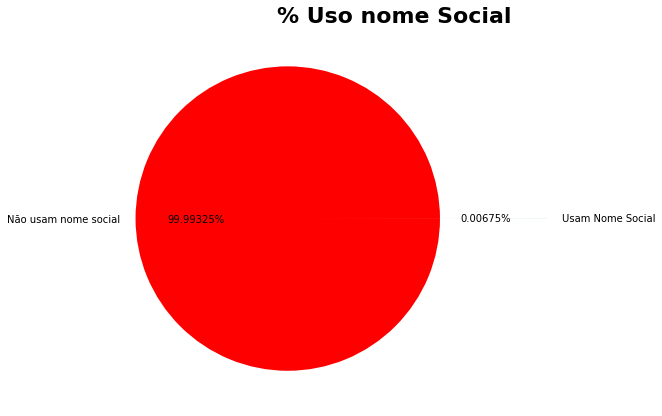

In [21]:
total_eleitores = df_perfil_eleitorado.QT_ELEITORES_PERFIL.sum()
eleitores_nm_social = df_perfil_eleitorado.QT_ELEITORES_INC_NM_SOCIAL.sum()
pct_social_name_used = (eleitores_nm_social/total_eleitores)*100


plt.figure(figsize=(15,7))
plt.title('% Uso nome Social',fontdict=title_font)
plt.pie([pct_social_name_used, 100-pct_social_name_used], explode=[0,0.7], labels=['Usam Nome Social', 'Não usam nome social'], autopct='%2.5f%%', colors=['green','red'])
plt.show()

[Back to the top](#index)

<a name="analysis_2"></a>
## 4.2 - Relacionar as características do eleitorado de acordo com o representante eleito em determinada região; 
[Back to the top](#index)

In [25]:
#TODO

<a name="analysis_3"></a>
## 4.3 - Mostrar a renda média do eleitorado de determinada região; 
[Back to the top](#index)

In [150]:
df_renda_mun_1 = df_renda_mun.copy()
# ajustando nomes das cidade para maiusculo para faciliar a query
df_renda_mun_1.Localidade = df_renda_mun_1.Localidade.str.upper()
df_renda_mun_1 = df_renda_mun_1.query(f'Nome == "Salário médio mensal" & Localidade == @all_cities')
df_renda_mun_1 = df_renda_mun_1.drop(columns=['Nome', 'Posição', 'Multiplicador', 
                                              'Unidade', '2006', '2007', 'Localidade']).reset_index().drop(columns=['index'])
df_renda_media = df_renda_mun_1.mean(axis=0).reset_index()
df_renda_media = df_renda_media.rename(columns={"index": "Ano", 0: "Média"})
df_renda_media


,Ano,Média
0,2008,2.662791
1,2009,2.616279
2,2010,2.548837
3,2011,2.572093
4,2012,2.423256
5,2013,2.395349
6,2014,2.402326
7,2015,2.383721
8,2016,2.306977
9,2017,2.320930


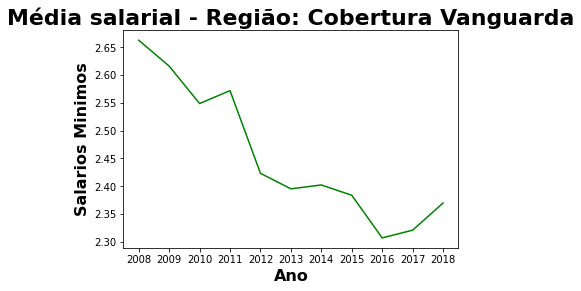

In [154]:
plt.title('Média salarial - Região: Cobertura Vanguarda',fontdict=title_font)
plt.plot(df_renda_media.Ano, df_renda_media.Média, color='g')
plt.xlabel('Ano',fontdict=label_font)
plt.ylabel('Salarios Minimos',fontdict=label_font)
plt.show()

<a name="analysis_4"></a>
## 4.4 -  Mostrar, daquela região, a cidade com mais eleitores jovem e mais eleitores idosos;
[Back to the top](#index)

<a name="analysis_5"></a>
## 4.5 -  Comparar a renda média de eleitores do Vale do Paraíba com a de outras regiões do Estado;
[Back to the top](#index)

<a name="analysis_6"></a>
## 4.6 - Automatizar a exportação das estatísticas;
[Back to the top](#index)

<a name="analysis_7"></a>
## 4.7 - Relacionar características do eleitorado de acordo com o representante eleito em determinada região de eleições futuras;
[Back to the top](#index)

<a name="analysis_8"></a>
## 4.8 - Mostrar a percentagem de eleitores ausentes da última eleição;
[Back to the top](#index)

<a name="analysis_9"></a>
## 4.9 - Mostrar a evolução do número de eleitores;
[Back to the top](#index)